In [430]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.optimize import curve_fit

# Parte 1 - Resorte simple

## Resorte estatico

In [431]:
# Load all files in ./mediciones directory
path = './mediciones'
mediciones = os.listdir(path)
files_pesos = [f for f in mediciones if f.startswith('peso')]
files_pesos.sort()

# Load all files
dfs_pesos = []
df = pd.DataFrame(columns=['M', 'L'])

for f in files_pesos:
    peso = pd.read_csv(f'{path}/{f}', sep=',', header=0, nrows=0).columns[1]
    distancia = pd.read_csv(f'{path}/{f}', sep=',', header=1, nrows=0).columns[1]
    df = pd.concat([df, pd.DataFrame({'M': float(peso)/1000, 'L': float(distancia)/1000}, index=[0])], ignore_index=True)

    dfs_pesos.append(pd.read_csv(f'{path}/{f}', sep=',', header=2))

/tmp/ipykernel_783354/4018882431.py:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [432]:
df

M      L
0  0.17486  0.367
1  0.27479  0.402
2  0.27278  0.403
3  0.32518  0.418
4  0.37048  0.434
5  0.42511  0.455
6  0.52303  0.487
7  0.62093  0.518
8  0.71865  0.552

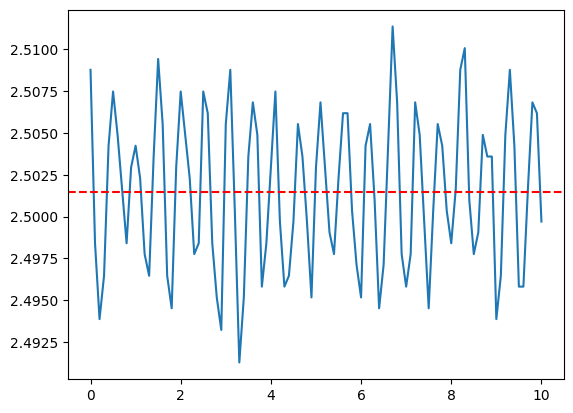

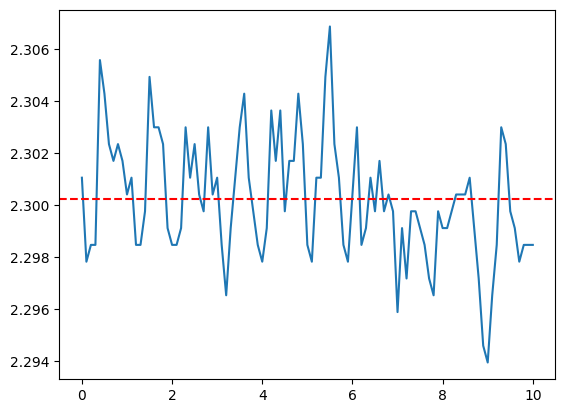

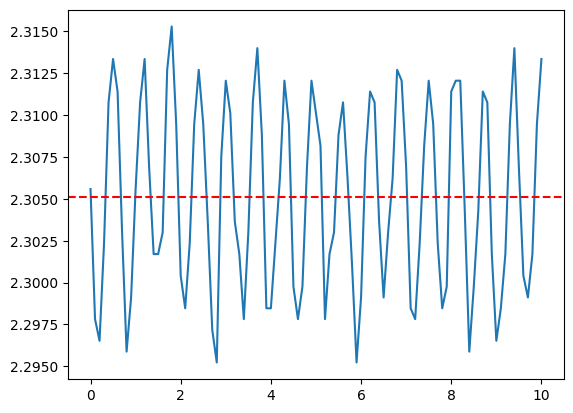

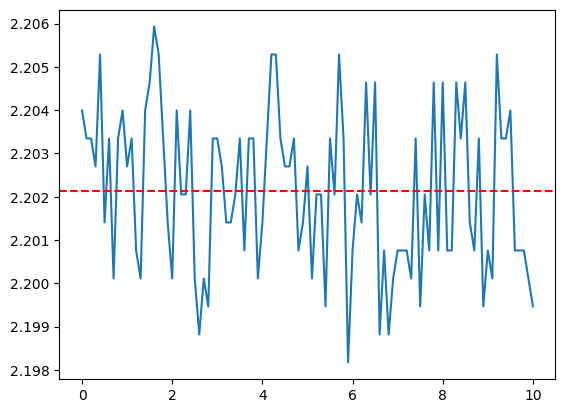

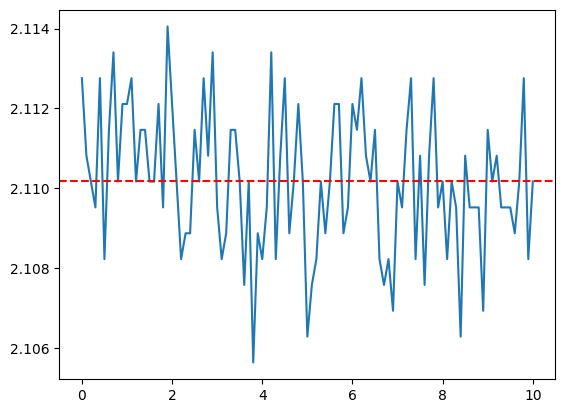

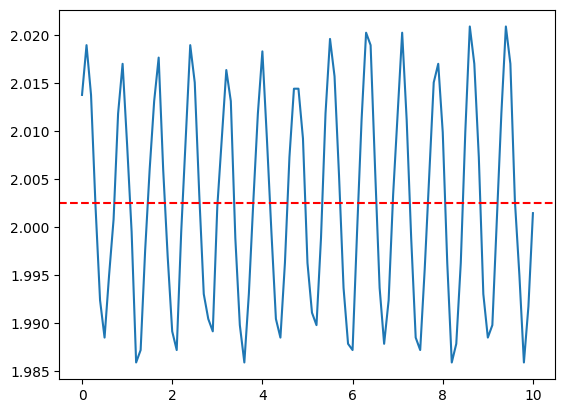

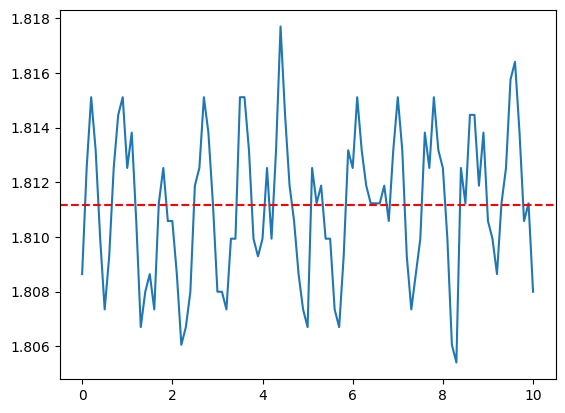

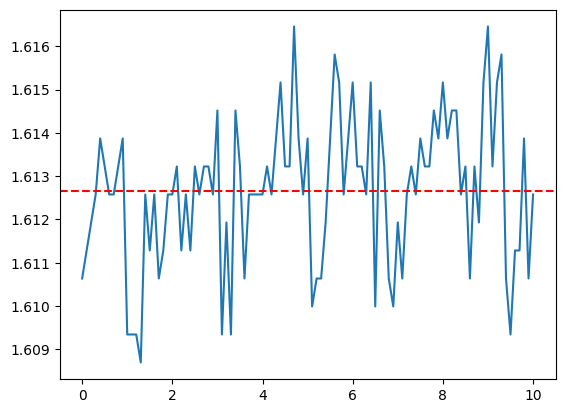

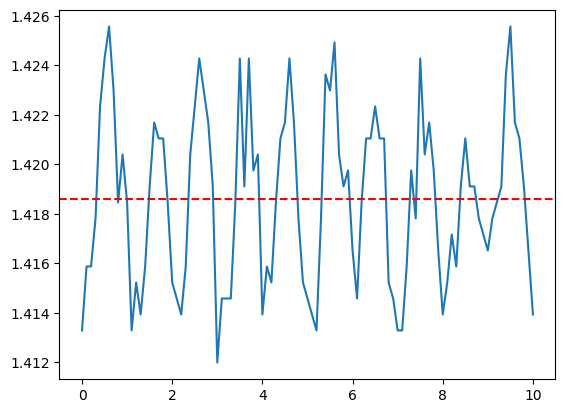

In [433]:
for df_peso in dfs_pesos:
    plt.plot(df_peso['time'], df_peso['(N)'])
    # add mean value
    plt.axhline(y=df_peso['(N)'].mean(), color='r', linestyle='--')
    plt.show()

In [434]:
# 1 A
# medimos la longitud natural del resorte, si esta horizontal nos da 307 mm y si esta en vertical nos da 310 mm
# Como nos interesa saber x_eq - l_0, vamos realizar estadistica para calcular L = x_eq - l_0

l_0 = 0.310
dl_0 = 0.001
dL = 0.001

df.loc[:, 'L'] = df['L'] - l_0

# Anotamos el error en la medida del resorte
df.loc[:, "dL"] = np.sqrt(dl_0**2 + dL**2)
df

M      L        dL
0  0.17486  0.057  0.001414
1  0.27479  0.092  0.001414
2  0.27278  0.093  0.001414
3  0.32518  0.108  0.001414
4  0.37048  0.124  0.001414
5  0.42511  0.145  0.001414
6  0.52303  0.177  0.001414
7  0.62093  0.208  0.001414
8  0.71865  0.242  0.001414

In [435]:
# Calculamos dM, como M es la medida indirecta de la suma de todos los pesos, entonces hay hacer propagacion de errores. este mismo ejemplo estan en el apunte
#http://materias.df.uba.ar/f1qa2021v/files/2020/03/Clase-5-Mediciones-Indirectas.pdf pagina 15

# el error instrumental seria sqrt(numero de pesos) * 0.00001 (error de inst de balanza), como no hicimos varios pesajes el error estadistico es 0

df.loc[:, "dM"] = np.sqrt(np.array([1,2,2,2,3,3,4,5,6])) * 0.00001
df = df[['M', 'dM', 'L', 'dL']]
df

M        dM      L        dL
0  0.17486  0.000010  0.057  0.001414
1  0.27479  0.000014  0.092  0.001414
2  0.27278  0.000014  0.093  0.001414
3  0.32518  0.000014  0.108  0.001414
4  0.37048  0.000017  0.124  0.001414
5  0.42511  0.000017  0.145  0.001414
6  0.52303  0.000020  0.177  0.001414
7  0.62093  0.000022  0.208  0.001414
8  0.71865  0.000024  0.242  0.001414

In [436]:
# haciendo estadistica ya que tenemos muchas mediciones de V en el tiempo nos queda que
# esto no se usa 

df.loc[:, 'V'] = np.nan
df.loc[:, 'dV'] = np.nan

for i, peso in enumerate(dfs_pesos):
    n_samples = len(peso)
    V = peso['(N)'].mean()

    # TODO asumo dV instrmental como 0.01 pero hay que hacer la medida en origin, hay que hacer mucho zoom y ver los saltos entre los voltajes
    dV = np.sqrt((peso['(N)'].std() / np.sqrt(n_samples))**2 + 0.01**2)
    #df['V'].iloc[i] = V
    #df['dV'].iloc[i] = dV
    df.loc[i, 'V'] = V
    df.loc[i, 'dV'] = dV

df

/tmp/ipykernel_783354/624728223.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_783354/624728223.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



M        dM      L        dL         V        dV
0  0.17486  0.000010  0.057  0.001414  2.501489  0.010011
1  0.27479  0.000014  0.092  0.001414  2.300220  0.010003
2  0.27278  0.000014  0.093  0.001414  2.305115  0.010016
3  0.32518  0.000014  0.108  0.001414  2.202142  0.010002
4  0.37048  0.000017  0.124  0.001414  2.110176  0.010002
5  0.42511  0.000017  0.145  0.001414  2.002475  0.010060
6  0.52303  0.000020  0.177  0.001414  1.811149  0.010004
7  0.62093  0.000022  0.208  0.001414  1.612655  0.010001
8  0.71865  0.000024  0.242  0.001414  1.418619  0.010006

In [437]:
def error_relativo(dX, X):
    return dX / X

def mayorErrorRelativo(df, col1, dcol1, col2, dcol2):
    res = []
    erroresRelativos1 = []
    erroresRelativos2 = []

    for index, row in df.iterrows():
        errorRelativoM = error_relativo(row[dcol1], row[col1])
        errorRelativow = error_relativo(row[dcol2], row[col2])

        if errorRelativoM > errorRelativow:
            res.append(col1)
        else:
            res.append(col2)

        erroresRelativos1.append(errorRelativoM)
        erroresRelativos2.append(errorRelativow)

    return (res, erroresRelativos1, erroresRelativos2)

res, erroresRelativosM, erroresRelativosL = mayorErrorRelativo(df, 'M', "dM", "L", 'dL')

print(erroresRelativosM)

print(erroresRelativosL)

print(res)

[5.7188608029280565e-05, 5.1465248457843996e-05, 5.1844474022035905e-05, 4.3490176590598906e-05, 4.675153335048794e-05, 4.0743591248591596e-05, 3.823872435615548e-05, 3.60115951475978e-05, 3.408459949604367e-05]
[0.024810764252159563, 0.015371886547533638, 0.015206597444871985, 0.013094570021973104, 0.011404948083653992, 0.009753196981883414, 0.007989907132051385, 0.006799103665255264, 0.0058438576957565895]
['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']


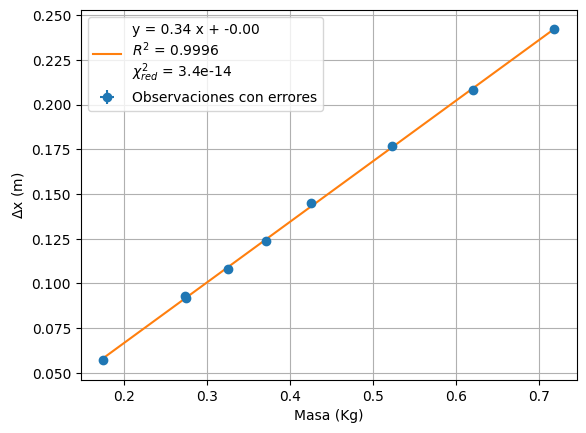

Valor de a = 0.3383754210105436 +- 0.00280667071254477
Valor de b = -0.0008838910693577979 +- 0.0012481129648870245
Valor de K = 28.95304857173634 +- 0.2401524118462685
Valor de R2 = 0.9995785464730675
Valor de chi_2_red = 3.392220650838675e-14


In [438]:
# 2C
def lineal(x, a, b):
    return a * x + b

def fit_with_curve(lineal, x, y, y_err):
    popt, pconv = curve_fit(lineal, x, y, sigma=y_err, absolute_sigma=True)
    return popt[0], popt[1], np.sqrt(pconv.diagonal())[0], np.sqrt(pconv.diagonal())[1]

a, b, da, db = fit_with_curve(lineal, df['M'], df['L'], df['dL'])

R2 = 1 - np.sum((lineal(df['M'], a, b) - df['L'])**2) / np.sum((df['L'] - np.mean(df['L']))**2)
chi_square = np.sum((df['L'] - lineal(df['M'], a, b)) / df['dL'])**2
chi_square_red = chi_square / (len(df) - 2)

plt.errorbar(df['M'], df['L'], xerr=df['dM'], yerr=df['dL'], fmt='o', label='Observaciones con errores')
#plt.plot(df['M'], df['L'], 'o', label='Observaciones')

plt.plot(df['M'], lineal(df['M'], a, b), label=f"y = {a:.2f} x + {b:.2f}" + "\n" +r"$R^2$"+f" = {R2:.4}"+ "\n" +r"$\chi _{red}^{2}$"+f" = {chi_square_red:.1e}")

plt.xlabel("Masa (Kg)")
plt.ylabel(r'$\Delta$x (m)')
plt.legend()
plt.grid()
plt.show()

print(f"Valor de a = {a} +- {da}")
print(f"Valor de b = {b} +- {db}")

# calculemos K
# TODO si quieren ponemos g de la notebook anterior
g = 9.797
K = g/a
dK = g/a**2 * da
print(f"Valor de K = {K} +- {dK}")
print(f"Valor de R2 = {R2}")
print(f"Valor de chi_2_red = {chi_square_red}")

In [439]:
intervals = []
intervals.append((K - dK, K + dK))

## Resorte dinamico

In [440]:
files_periodos = [f for f in mediciones if f.startswith('periodo')]
files_periodos.sort()

# Load all files
dfs_periodos = []
pesos = []
for f in files_periodos:
    peso = pd.read_csv(f'{path}/{f}', sep=',', header=0, nrows=1).columns[1]
    pesos.append(float(peso)/1000)
    df = pd.read_csv(f'{path}/{f}', sep=',', header=1)
    dfs_periodos.append(df)


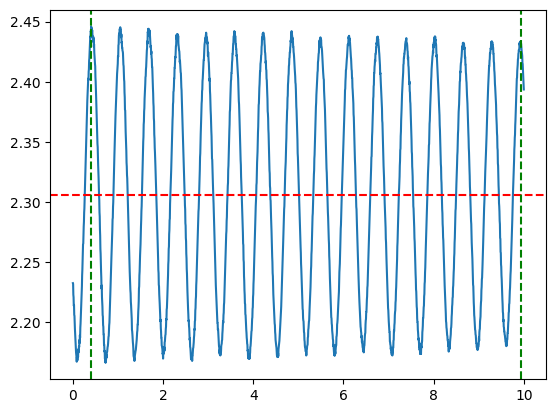

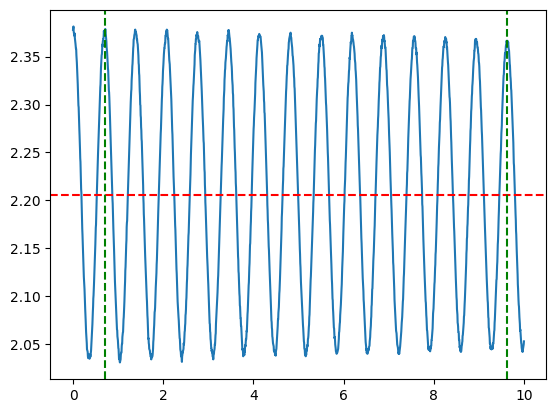

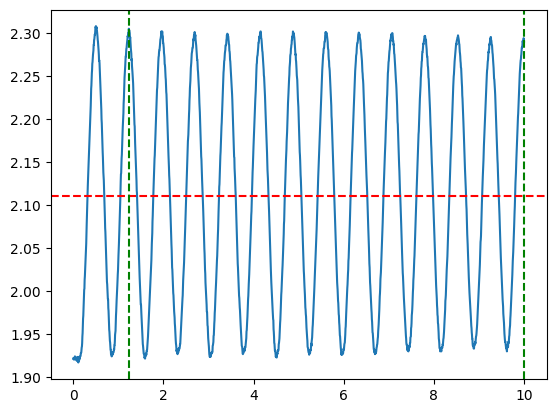

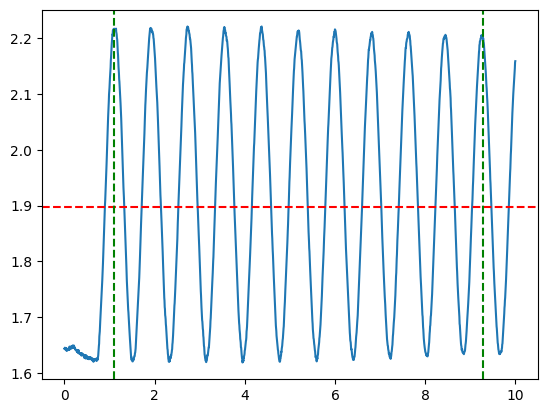

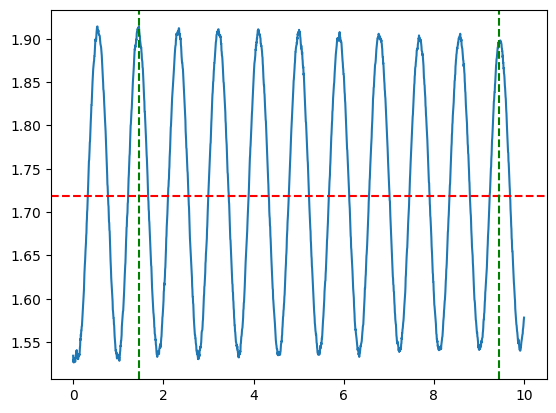

In [441]:
# 1 A
# hay que calcular el prime y ultimo pico y hacer su resta y despues dividir por la #ciclos que es #picos - 1
# para eso primero calculamos los picos del borde y los guardamos

local_maximas_index = []

def find_first_local_maxima(arr):
    rad = 3
    for i in range(rad, len(arr) - rad):
        if arr[i] > arr.mean() and arr[i] > max(arr[i - rad:i]) and arr[i] > max(arr[i + 1:i + rad + 1]):
            return i
    return None

def find_last_local_maxima(arr):
    rad = 3
    for i in range(len(arr) - 2, 0, -1):
        if arr[i] > arr.mean() and arr[i] > max(arr[i - rad:i]) and arr[i] > max(arr[i + 1:i + rad + 1]):
            return i
    return None

for df in dfs_periodos:
    plt.plot(df['time'], df['(N)'])
    plt.axhline(y=df['(N)'].mean(), color='r', linestyle='--')

    arr = df['(N)']
    local_maxima_indices = [find_first_local_maxima(arr), find_last_local_maxima(arr)]
    local_maximas_index.append((find_first_local_maxima(arr), find_last_local_maxima(arr)))
    for i in local_maxima_indices:
        plt.axvline(x=dfs_periodos[0]['time'][i], color='g', linestyle='--')
    plt.show()


In [442]:
# calculamos el tiempo entre los picos graficados: restamos los indices de los picos y multiplicamos por 0.005 que es 1/f y para obtener el tiempo
# luego calculamos el periodo dividiendo por el #ciclos = #picos - 1

periods = []
local_maximas_cicles = [15,13,12,10,9]

for k in range(len(local_maximas_index)):
    periods.append((local_maximas_index[k][1] - local_maximas_index[k][0]) * 0.005 / local_maximas_cicles[k])

periods

[0.635, 0.6861538461538461, 0.7295833333333334, 0.817, 0.8861111111111112]

In [443]:
# Como T = t_f - t_i / (N-1)
dT = np.sqrt(0.005**2 + 0.005**2) / local_maximas_cicles

df = pd.DataFrame()

df['T'] = np.array(periods)
df.loc[:, 'dT'] = dT

df['M'] = np.array(pesos)
df.loc[:, "dM"] = np.sqrt(np.array([2,2,3,4,5])) * 0.00001

df['1_M'] = 1/df['M']
df['d_1_M'] = df['dM'] / df['M']**2

df['1_sqrt_M'] = 1/np.sqrt(df['M'])
df['d_1_sqrt_M'] = df['dM'] / (2 * (df['M'])**(3/2))

df['w'] = 2*np.pi / df['T']
df.loc[:, 'dw'] = 2*np.pi / (df['T']**2) * df['dT']

df['w2'] = df['w']**2
df['dw2'] = 2 * df['w'] * df['dw']

df['1_w2'] = 1/df['w']**2
df['d_1_w2'] = df['dw'] / (2 * df['w']**3)

#df['M w2'] = df['M'] * df['w']**2
#df['d_M w2'] = np.sqrt((df['w']**2 * df['dM'])**2 + (2 * df['w'] * df['M'] * df['dw'])**2)

df

T        dT        M        dM       1_M     d_1_M  1_sqrt_M  \
0  0.635000  0.000471  0.27276  0.000014  3.666227  0.000190  1.914739   
1  0.686154  0.000544  0.32518  0.000014  3.075220  0.000134  1.753630   
2  0.729583  0.000589  0.36768  0.000017  2.719756  0.000128  1.649168   
3  0.817000  0.000707  0.46540  0.000020  2.148689  0.000092  1.465841   
4  0.886111  0.000786  0.56033  0.000022  1.784663  0.000071  1.335913   

   d_1_sqrt_M         w        dw         w2       dw2      1_w2    d_1_w2  
0    0.000050  9.894780  0.007346  97.906671  0.145366  0.010214  0.000004  
1    0.000038  9.157109  0.007259  83.852638  0.132943  0.011926  0.000005  
2    0.000039  8.612019  0.006956  74.166866  0.119803  0.013483  0.000005  
3    0.000031  7.690557  0.006656  59.144671  0.102378  0.016908  0.000007  
4    0.000027  7.090742  0.006287  50.278623  0.089160  0.019889  0.000009

In [444]:
res, erroresRelativos1, erroresRelativos2 = mayorErrorRelativo(df, '1_sqrt_M', 'd_1_sqrt_M', 'w', 'dw')
print(erroresRelativos1)
print(erroresRelativos2)
print(res)

[2.592413774697711e-05, 2.1745088295299453e-05, 2.355378056419818e-05, 2.1486892995272885e-05, 1.995313455909723e-05]
[0.0007423693240803648, 0.0007927206067113761, 0.0008076605153472844, 0.0008654917762381245, 0.0008866542710803104]
['w', 'w', 'w', 'w', 'w']


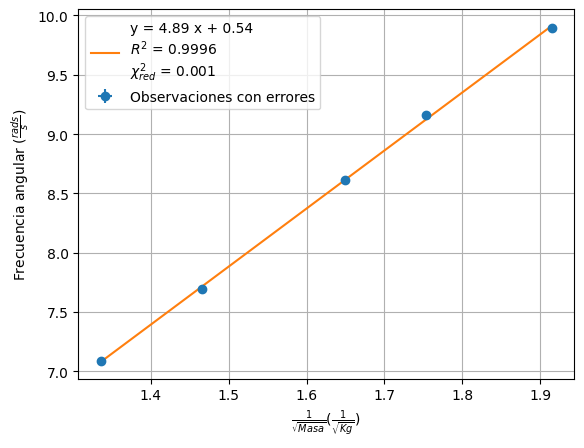

Valor de a = 4.892770432737288 +- 0.014899774939869093
Valor de b = 0.5437051947381365 +- 0.024044332855883945
Valor de K = 23.93920250746823 +- 0.145802356560463
Valor de R2 = 0.9995712351158462
Valor de chi_2_red = 0.001023512373532583


In [445]:
# 2C
a, b, da, db = fit_with_curve(lineal, df['1_sqrt_M'], df['w'], df['dw'])

R2 = 1 - np.sum((lineal(df['1_sqrt_M'], a, b) - df['w'])**2) / np.sum((df['w'] - np.mean(df['w']))**2)
chi_square = np.sum((df['w'] - lineal(df['1_sqrt_M'], a, b)) / df['dw'])**2
chi_square_red = chi_square / (len(df) - 2)

plt.errorbar(df['1_sqrt_M'], df['w'], xerr=df['d_1_sqrt_M'], yerr=df['dw'], fmt='o', label='Observaciones con errores')
#plt.plot(df['1_sqrt_M'], df['w'], 'o', label='Observaciones')

plt.plot(df['1_sqrt_M'], lineal(df['1_sqrt_M'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n" + r"$R^2$" + f" = {R2:.4f}\n" + r"$\chi _{red}^{2}$"+f" = {chi_square_red:.3f}")

plt.xlabel(r'$\frac{1}{\sqrt{Masa}} (\frac{1}{\sqrt{Kg}})$')
plt.ylabel(r'Frecuencia angular ($\frac{rads}{s}$)')
plt.legend()
plt.grid()
plt.show()

print(f"Valor de a = {a} +- {da}")
print(f"Valor de b = {b} +- {db}")

# calculemos K
K = a**2
dK = 2*a * da
print(f"Valor de K = {K} +- {dK}")
print(f"Valor de R2 = {R2}")
print(f"Valor de chi_2_red = {chi_square_red}")

In [446]:
intervals.append((K - dK, K + dK))

In [447]:
res, erroresRelativos1, erroresRelativos2 = mayorErrorRelativo(df, '1_M', 'd_1_M', 'w2', 'dw2')
print(erroresRelativos1)
print(erroresRelativos2)
print(res)

[5.184827549395422e-05, 4.34901765905989e-05, 4.710756112839637e-05, 4.297378599054578e-05, 3.990626911819446e-05]
[0.0014847386481607297, 0.0015854412134227525, 0.0016153210306945685, 0.001730983552476249, 0.0017733085421606208]
['w2', 'w2', 'w2', 'w2', 'w2']


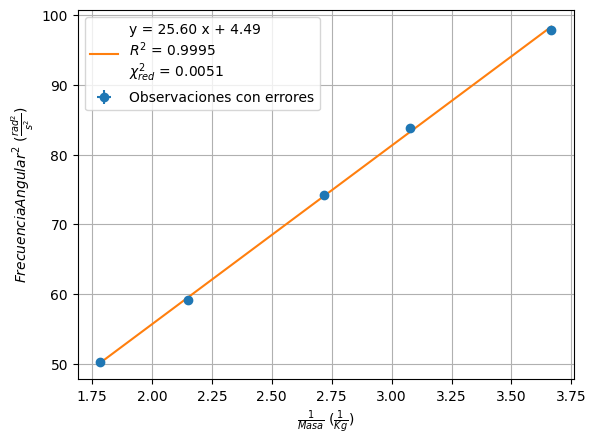

Valor de a = 25.59923903187792 +- 0.07868037706939922
Valor de b = 4.486838998330873 +- 0.19909044013500155
Valor de K = 25.59923903187792 +- 0.07868037706939922
Valor de R2 = 0.9994923797168247
Valor de chi_2_red = 0.00506185054361873


In [448]:
a, b, da, db = fit_with_curve(lineal, df['1_M'], df['w2'], df['dw2'])

R2 = 1 - np.sum((lineal(df['1_M'], a, b) - df['w2'])**2) / np.sum((df['w2'] - np.mean(df['w2']))**2)
chi_square = np.sum((df['w2'] - lineal(df['1_M'], a, b)) / df['dw2'])**2
chi_square_red = chi_square / (len(df) - 2)


plt.errorbar(df['1_M'], df['w2'], xerr=df['d_1_M'], yerr=df['dw2'], fmt='o', label='Observaciones con errores')
#plt.plot(df['1_M'], df['w2'], 'o', label='Observaciones')

plt.plot(df['1_M'], lineal(df['1_M'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n" + r"$R^2$" + f" = {R2:.4f}\n" + r"$\chi _{red}^{2}$"+f" = {chi_square_red:.4f}")

plt.xlabel(r'$\frac{1}{Masa}$ ($\frac{1}{Kg}$)')
plt.ylabel(r'${Frecuencia Angular^2}$ ($\frac{rad^2}{s^2}$)')
plt.legend()
plt.grid()
plt.show()

print(f"Valor de a = {a} +- {da}")
print(f"Valor de b = {b} +- {db}")

# calculemos K
K = a
dK = da
print(f"Valor de K = {K} +- {dK}")
print(f"Valor de R2 = {R2}")
print(f"Valor de chi_2_red = {chi_square_red}")


In [449]:
intervals.append((K - dK, K + dK))

In [450]:
res, erroresRelativos1, erroresRelativos2 = mayorErrorRelativo(df, 'M', 'dM', '1_w2', 'd_1_w2')
print(erroresRelativos1)
print(erroresRelativos2)
print(res)

[5.184827549395422e-05, 4.3490176590598906e-05, 4.710756112839636e-05, 4.297378599054577e-05, 3.990626911819446e-05]
[0.0003711846620401824, 0.00039636030335568796, 0.0004038302576736421, 0.0004327458881190622, 0.0004433271355401552]
['1_w2', '1_w2', '1_w2', '1_w2', '1_w2']


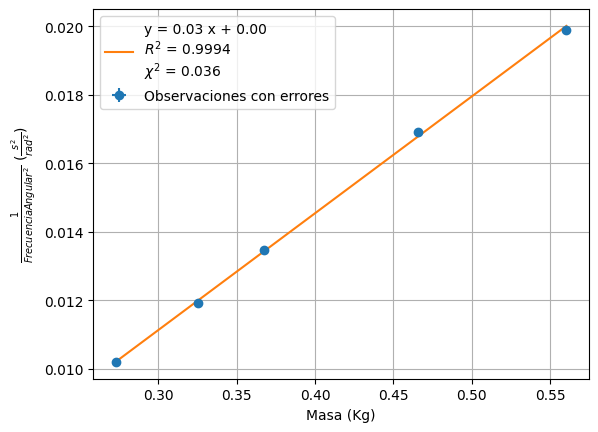

Valor de a = 0.03410744529279723 +- 2.8115144268852918e-05
Valor de b = 0.000901007992122697 +- 9.962928162576845e-06
Valor de K = 29.31911174863568 +- 0.02416806798548438
Valor de R2 = 0.9993572536008195
Valor de chi_2_red = 0.03603838436991037


In [451]:
a, b, da, db = fit_with_curve(lineal, df['M'], df['1_w2'], df['d_1_w2'])

R2 = 1 - np.sum((lineal(df['M'], a, b) - df['1_w2'])**2) / np.sum((df['1_w2'] - np.mean(df['1_w2']))**2)
chi_square = np.sum((df['1_w2'] - lineal(df['M'], a, b)) / df['d_1_w2'])**2
chi_square_red = chi_square / (len(df) - 2)

plt.errorbar(df['M'], df['1_w2'], xerr=df['dM'], yerr=df['d_1_w2'], fmt='o', label='Observaciones con errores')
#plt.plot(df['M'], df['1_w2'], 'o', label='Observaciones')

plt.plot(df['M'], lineal(df['M'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n" + r"$R^2$" + f" = {R2:.4f}\n" + f"$\chi^{2}$ = {chi_square_red:.3f}")

plt.xlabel(r'Masa (Kg)')
plt.ylabel(r'$\frac{1}{Frecuencia Angular^2}$ ($\frac{s^2}{rad^2}$)')
plt.legend()
plt.grid()
plt.show()

print(f"Valor de a = {a} +- {da}")
print(f"Valor de b = {b} +- {db}")

# calculemos K
K = 1/a
dK = 1/a**2 * da
print(f"Valor de K = {K} +- {dK}")
print(f"Valor de R2 = {R2}")
print(f"Valor de chi_2_red = {chi_square_red}")


In [452]:
intervals.append((K - dK, K + dK))

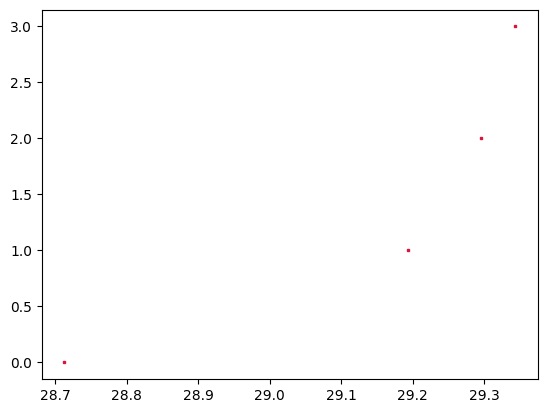

In [454]:
def drawp(p, dy=1,**kw):
    for i,x in enumerate(p):
        plt.plot(np.unique(x),[i*dy]*len(np.unique(x)), marker="s"*(2-len(np.unique(x))), ms=kw.get("lw",2),**kw)

drawp(intervals[0] + intervals[3], color="crimson")

plt.show()

# Parte 2: Amortiguado

## Punto 1

In [399]:
# Load all files in ./mediciones directory
mediciones = os.listdir('./mediciones/amortiguado')
files_amort = [f for f in mediciones if f.startswith('resortecalibrado')]
files_amort.sort()

# Load all files
dfs_amort = []
df = pd.DataFrame(columns=['M', 'L'])

for f in files_amort:
    # peso = pd.read_csv(f'./mediciones/amortiguado/{f}', sep=',', header=0, nrows=0).columns[1]
    # distancia = pd.read_csv(f'./mediciones/amortiguado/{f}', sep=',', header=1, nrows=0).columns[1]
    # temp_df = pd.DataFrame({'M': float(peso)/1000,
    #                              'L': float(distancia)/1000}, index=[0])
    # df = pd.concat([df, temp_df], ignore_index=True)

    dfs_amort.append(pd.read_csv(f'./mediciones/amortiguado/{f}', sep=',', header=0))



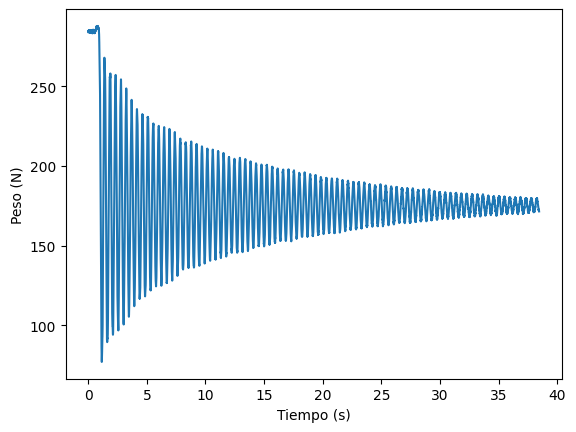

In [400]:
plt.plot(dfs_amort[1]['time'], dfs_amort[1]['(N)'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Peso (N)')
plt.show()

In [401]:
df = dfs_amort[0].copy()
df

time       (N)
0      0.000  270.5855
1      0.005  269.6783
2      0.010  270.0574
3      0.015  270.2064
4      0.020  270.6532
...      ...       ...
8898  44.490  174.7893
8899  44.495  174.5997
8900  44.500  174.2341
8901  44.505  174.1935
8902  44.510  173.8279

[8903 rows x 2 columns]

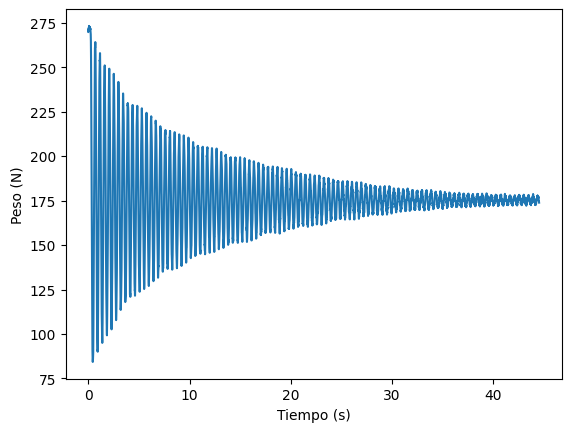

In [402]:
plt.plot(df['time'], df['(N)'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Peso (N)')
plt.show()

In [403]:
fig = px.line(df, x='time', y='(N)', title='Peso vs Tiempo')
fig.show()

In [404]:
#graficamente vemos que el primer pico esta en t = 0.7
df[df['time'] == 0.7]

time       (N)
140   0.7  264.0727

In [405]:
df = df[140:]

# tambien observamos que luego de 30 segundos los valores de la posicion dejan de comportarse como esperamos asi que los sacamos
df = df[df['time'] <= 30]
df

time       (N)
140    0.700  264.0727
141    0.705  263.5040
142    0.710  263.4769
143    0.715  262.1771
144    0.720  259.8888
...      ...       ...
5996  29.980  169.6711
5997  29.985  169.9148
5998  29.990  170.0096
5999  29.995  170.4564
6000  30.000  170.7543

[5861 rows x 2 columns]

In [406]:
# escalamos los valores para que en vez de ser peso sea fuerza como lo pide el tp
df['(N)'] = df['(N)'] * g

In [407]:
# restamos la media (casi igua al F0)
df['(N)'].mean()

1716.864400894245

In [408]:
df['(N)'] = df['(N)'] - df['(N)'].mean()

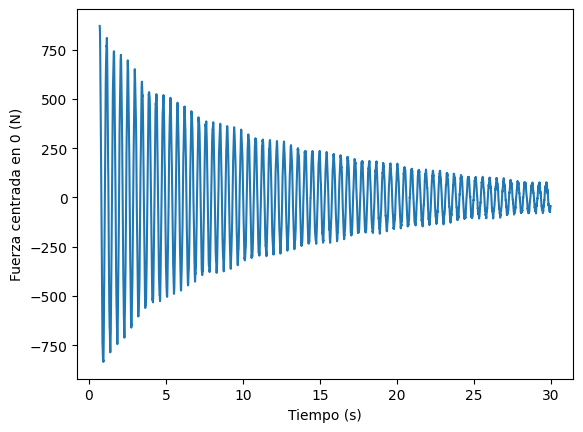

In [409]:
plt.plot(df['time'], df['(N)'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Fuerza centrada en 0 (N)')
plt.show()

In [410]:
# calculamos el error instrumental de origin, para calculamos la longitud del salto de voltaje (salto en N)

aux = df['(N)'].diff().dropna().abs()
y_error = aux[aux > 0].min()
y_error

0.1322594999996909

In [411]:
y_err = np.full(df['(N)'].shape[0], y_error)

### Fit general

Intento de fit de toda la función sinusoidal con amplitud dada por una función exponencial (comparar con próximo método usando solo los máximos)

In [412]:
def Amp(A, lamb, t):
    return A * np.exp(-lamb * t)

def cos(t, A, lamb, w, phi, F0):
    return Amp(A, lamb, t) * np.cos(w * t + phi) + F0

# Fit the sin function to the data
p0 = {'A': 95,
      'lamb': 1,
      'w': 15,
      'phi': 0,
      'F0': 0}

# Set bounds for the parameters as dictionary to zip later
p0_bounds = ([90, 0, 0, -np.pi, -50],
             [100, 1, 20, np.pi, 50])

popt, pcov = curve_fit(cos,
                       df['time'], 
                       df['(N)'],
                       p0=list(p0.values()),
                       sigma=y_err,
                       absolute_sigma=True
                       )
                      #method='trf', maxfev=10000, bounds=p0_bounds)

chi_square = np.sum((df['(N)'] - cos(df['time'], *popt)) / y_err)**2
chi_square_red = chi_square / (len(df['(N)']) - 6)

# Plot the data and the fit using plotly
x = np.linspace(0, 30, 10000)
y = cos(x, *popt)

fig = px.line(x=x, y=y).update_layout(
    xaxis_title="Tiempo",
    yaxis_title="Fuerza centrada en 0 (N)",
    legend=dict(
        x=0.9, 
        y=1,
        valign="top",
    ) 
)
# Add the data to the plot with pointy lines
fig.add_scatter(x=df['time'], y=df['(N)'], mode='markers', name="Mediciones", marker=dict(size=3))
fig.show()

print(f"A: {popt[0]} +- {np.sqrt(pcov[0,0])}")
print(f"lambda: {popt[1]} +- {np.sqrt(pcov[1,1])}")
print(f"w: {popt[2]} +- {np.sqrt(pcov[2,2])}")
print(f"phi: {popt[3]} +- {np.sqrt(pcov[3,3])}")
print(f"F0: {popt[4]} +- {np.sqrt(pcov[4,4])}")

print(f"Valor de chi_2_red = {chi_square_red}")

m = 0.12671
dm = 0.00001
b = 2 * m * popt[1]
db = np.sqrt((2*m*pcov[1,1])**2 + (2*popt[1]*dm)**2)

print(f"Valor de b = {b} +- {db}")


/home/matias/.cache/pypoetry/virtualenvs/mecanica-y-termodinamica-2024-1c-ADYk5r0H-py3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

overflow encountered in exp



A: 808.7070655467629 +- 0.009185542217930083
lambda: 0.08762439822912571 +- 1.3939118369407803e-06
w: 13.631719805005375 +- 1.3927613070761779e-06
phi: 3.1786256150753855 +- 1.1327338354608183e-05
F0: 0.30018194122819514 +- 0.0017276894837915994
Valor de chi_2_red = 1.5833568061512676e-07
Valor de b = 0.022205774999225037 +- 1.7524879645825835e-06


# NOTA:

* Fittear todo junto parece que no funciona muy bien: Sospecho que es por la cola y que no hay forma de que un decaimiento exponencial quede bien ahí.
* Para buscar todos los picos de cada oscilacion:
  1. Centrar los puntos en cero restando la media de la cola
  2. Encontrar todos los valores donde se cruza el eje x (cuando dos puntos consecutivos tienen distinto signo)
  3. Cada pico va a estar entre dos cambios de signo, intercalando los correctos se obtienen los máximos


* Hay algunis puntos flojos en este analisis que deben ser considerados al implementarlo: la cola que se toma para que la función tenga media = 0, los puntos que definen el pico no necesariamente son el pico y hasta puede estar formado por varios.

* Posible solución: Ajustar un seno a cada oscilación positiva por separado para tener una mejor estimación del maximo de ese ciclo.
  * Ésto tiene el problema que es difícil propagar el error después (creo), pero haciéndolo a ojo como en los puntos anteriores capaz también es engorroso estimar el error del máximo elegido


Se traslada la función para tener como centro el eje x, luego se vuelve a trasladar a su posición original

In [413]:
fig = px.line(df, x='time', y='(N)', title='Peso vs Tiempo (centrado en cero)')
fig.show()

In [414]:
df["sign"] = 2*(df["(N)"] > 0) - 1
df

time         (N)  sign
140    0.700  870.255841     1
141    0.705  864.684287     1
142    0.710  864.418788     1
143    0.715  851.684648     1
144    0.720  829.266173     1
...      ...         ...   ...
5996  29.980  -54.596634    -1
5997  29.985  -52.209105    -1
5998  29.990  -51.280350    -1
5999  29.995  -46.903050    -1
6000  30.000  -43.984524    -1

[5861 rows x 3 columns]

In [415]:
fig = px.line(df, x='time', y='sign', title='Signo de la curva')
fig.add_scatter(x=df['time'],
                y=df['(N)']/100,
                mode='markers', name="Mediciones", marker=dict(size=3))
fig.show()

In [416]:
df["cycle_start"] = (df["sign"].shift(1) == -1) & (df["sign"] == 1)
df["cycle_id"] = df["cycle_start"].cumsum()
df

time         (N)  sign  cycle_start  cycle_id
140    0.700  870.255841     1        False         0
141    0.705  864.684287     1        False         0
142    0.710  864.418788     1        False         0
143    0.715  851.684648     1        False         0
144    0.720  829.266173     1        False         0
...      ...         ...   ...          ...       ...
5996  29.980  -54.596634    -1        False        65
5997  29.985  -52.209105    -1        False        65
5998  29.990  -51.280350    -1        False        65
5999  29.995  -46.903050    -1        False        65
6000  30.000  -43.984524    -1        False        65

[5861 rows x 5 columns]

In [417]:
print(df[df["cycle_start"] == True])

        time        (N)  sign  cycle_start  cycle_id
208    1.040  18.494864     1         True         1
300    1.500  15.178580     1         True         2
392    1.960  17.963867     1         True         3
484    2.420  35.076287     1         True         4
576    2.880  52.586465     1         True         5
...      ...        ...   ...          ...       ...
5553  27.765   7.750494     1         True        61
5645  28.225   0.852426     1         True        62
5738  28.690   0.453689     1         True        63
5831  29.155   1.116945     1         True        64
5922  29.610   3.903212     1         True        65

[65 rows x 5 columns]


In [418]:
positive_cycles = df[df["sign"] == 1]
negative_cycles = df[df["sign"] == -1]

In [419]:
idx_max_force = positive_cycles.groupby("cycle_id")["(N)"].idxmax()
max_per_cycle = df.loc[idx_max_force, ["time","(N)"]]#.reset_index(drop=True)

idx_min_force = negative_cycles.groupby("cycle_id")["(N)"].idxmin()
min_per_cycle = df.loc[idx_min_force, ["time","(N)"]]#.reset_index(drop=True)

max_per_cycle

time         (N)
140    0.700  870.255841
233    1.165  809.368466
325    1.625  741.848521
416    2.080  723.675086
505    2.525  695.552798
...      ...         ...
5571  27.855   83.495020
5660  28.300   77.392469
5764  28.820   75.800456
5857  29.285   75.534957
5945  29.725   76.861471

[66 rows x 2 columns]

#### Observación:

Notar que en el siguiente gráfico, varios puntos son considerados maximos o mínimos erroneamente.

Hacer zoom para ver la causa.

In [420]:
fig = px.line(df, x='time', y='(N)', title='Peso vs Tiempo (centrado en cero)')

fig.add_scatter(x=max_per_cycle['time'],
                y=max_per_cycle['(N)'],
                mode='markers', name="Máximos", marker=dict(size=10))

fig.add_scatter(x=min_per_cycle['time'],
                y=min_per_cycle['(N)'],
                mode='markers', name="Mínimos", marker=dict(size=10))

fig.show()

Eliminamos puntos que no son verdaderos mínimos/máximos

In [421]:
signal_threshold = 50 # Valores por debajo son ignorados
max_per_cycle = max_per_cycle[max_per_cycle["(N)"] > signal_threshold]
min_per_cycle = min_per_cycle[min_per_cycle["(N)"] < -signal_threshold]

In [422]:
fig = px.line(df, x='time', y='(N)', title='Peso vs Tiempo (centrado en cero)')

fig.add_scatter(x=max_per_cycle['time'],
                y=max_per_cycle['(N)'],
                mode='markers', name="Máximos", marker=dict(size=10))

fig.add_scatter(x=min_per_cycle['time'],
                y=min_per_cycle['(N)'],
                mode='markers', name="Mínimos", marker=dict(size=10))

fig.show()

### Ajuste de función exponencial

In [423]:
def Amp(t, A, lamb, F0):
    return A * np.exp(-lamb * t) + F0

p0_max = {'A': 950,
          'lamb': 0.1,
          'F0': 0
         }

p0_min = p0_max.copy()
p0_min['A'] *= -1

popt_max, pcov_max = curve_fit(Amp, 
            max_per_cycle['time'], 
            max_per_cycle['(N)'],
            p0=list(p0_max.values()),
            #sigma=y_err,
            absolute_sigma=True)

popt_min, pcov_min = curve_fit(Amp, 
            min_per_cycle['time'], 
            min_per_cycle['(N)'],
            p0=list(p0_min.values()),
            #sigma=y_err,
            absolute_sigma=True)

print("Max values")
print("A: ", popt_max[0])
print("lambda: ", popt_max[1])
print("F0: ", popt_max[2])
print()

print("Min values")
print("A: ", popt_min[0])
print("lambda: ", popt_min[1])
print("F0: ", popt_min[2])

Max values
A:  814.5959552570429
lambda:  0.11238292547548219
F0:  65.41309902894902

Min values
A:  -808.3555611640431
lambda:  0.11110225746427282
F0:  -64.16940415462518


In [424]:
# Plot the data and the fit using plotly
t = np.linspace(0, 30, 1000)
y_max = Amp(t, *popt_max)
y_min = Amp(t, *popt_min)

fig = px.scatter(data_frame=pd.DataFrame()).update_layout(
    xaxis_title="Tiempo",
    yaxis_title="Fuerza centrada en 0 (N)",
    legend=dict(
        x=0.9, 
        y=1,
        valign="top",
    ) 
)

fig.add_scatter(x=t,
                y=y_max,
                mode='lines', name="Decay Max", marker=dict(size=3))

fig.add_scatter(x=t,
                y=y_min,
                mode='lines', name="Decay Min", marker=dict(size=3))

fig.add_scatter(x=max_per_cycle['time'],
                y=max_per_cycle['(N)'],
                mode='markers', name="Máximos", marker=dict(size=5))

fig.add_scatter(x=min_per_cycle['time'],
                y=min_per_cycle['(N)'],
                mode='markers', name="Mínimos", marker=dict(size=5))

fig.add_scatter(x=df['time'],
                y=df['(N)'],
                mode='lines', name="Mediciones", marker=dict(size=5))

fig.show()


In [379]:
((max_per_cycle['(N)'] - Amp(max_per_cycle['time'], *popt)))

140     87.212044
233     57.440327
325     19.484723
416     29.410584
505     27.712453
          ...    
5571    10.142253
5660     6.831556
5764     8.367592
5857    10.781660
5945    14.545562
Length: 64, dtype: float64

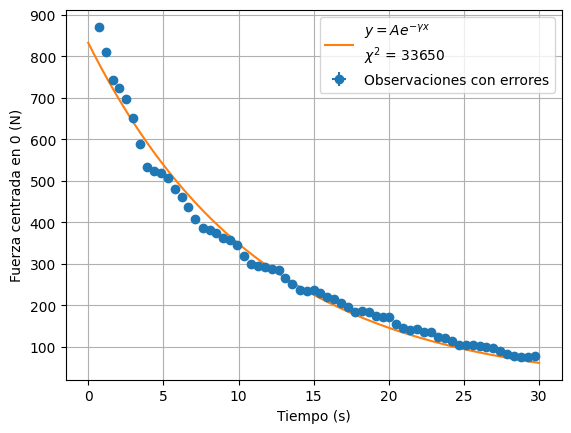

A: 832.3295313657524 +- 0.009185542217930083
lambda: 0.08719972021811806 +- 1.3939118369407803e-06
Valor de chi_2_red = 33650.01000988651
Valor de b = 0.022098153097675478 +- 1.7439944043624308e-06


In [375]:
def Amp(t, A, lamb):
    return A * np.exp(-lamb * t)

p0 = {'A': 850,
      'lamb': 0.1
     }

y_err = np.full(max_per_cycle['(N)'].shape[0], y_error)

p0_bounds = ([800, 0,],
             [900, 0.2])

popt, pcov_max = curve_fit(Amp, 
            max_per_cycle['time'], 
            max_per_cycle['(N)'],
            p0=list(p0.values()),
            bounds=p0_bounds,
            sigma=y_err,
            absolute_sigma=True)

chi_square = np.sum(((max_per_cycle['(N)'] - Amp(max_per_cycle['time'], *popt)) / y_err)**2)
chi_square_red = chi_square / (len(max_per_cycle['(N)']) - 3)

# Plot the data and the fit using plotly
x = np.linspace(0, 30, 10000)
y = Amp(x, *popt)

plt.errorbar(max_per_cycle['time'], max_per_cycle['(N)'], xerr=y_err, yerr=y_err, fmt='o', label='Observaciones con errores')
plt.plot(x, y, label=r"$y = A e^{-\gamma x}$" + '\n' + f"$\chi^{2}$ = {chi_square_red:.0f}")

plt.xlabel(r'Tiempo (s)')
plt.ylabel(r'Fuerza centrada en 0 (N)')
plt.legend()
plt.grid()
plt.show()

print(f"A: {popt[0]} +- {np.sqrt(pcov[0,0])}")
print(f"lambda: {popt[1]} +- {np.sqrt(pcov[1,1])}")
print(f"Valor de chi_2_red = {chi_square_red}")
b = 2 * m * popt[1]
db = np.sqrt((2*m*pcov[1,1])**2 + (2*popt[1]*dm)**2)

print(f"Valor de b = {b} +- {db}")


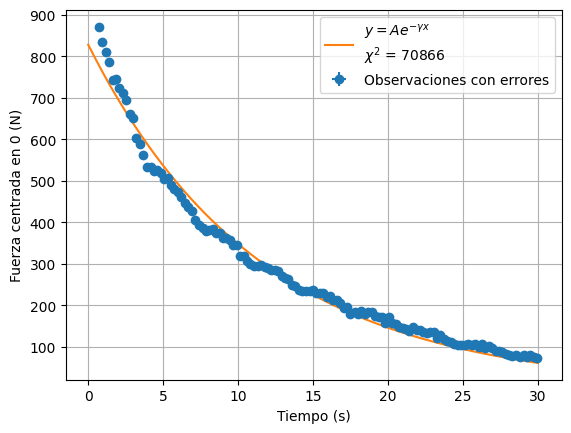

A: 827.6119470548604 +- 0.009185542217930083
lambda: 0.08668884603925549 +- 1.3939118369407803e-06
Valor de chi_2_red = 70866.33605758821
Valor de b = 0.021968687363268125 +- 1.7337769207851798e-06


In [280]:
p0 = {'A': 850,
      'lamb': 0.1
     }

all_cycles = max_per_cycle.copy()
aux = min_per_cycle.copy()
aux['(N)'] = aux['(N)'] * -1
all_cycles = pd.concat([all_cycles, aux])

y_err = np.full(all_cycles['(N)'].shape[0], y_error)

p0_bounds = ([800, 0],
             [900, 0.2])

popt, pcov_max = curve_fit(Amp, 
            all_cycles['time'],
            all_cycles['(N)'],
            p0=list(p0.values()),
            bounds=p0_bounds,
            sigma=y_err,
            absolute_sigma=True)

chi_square = np.sum((all_cycles['(N)'] - Amp(all_cycles['time'], *popt)) / y_err)**2
chi_square_red = chi_square / (len(all_cycles['(N)']) - 3)

# Plot the data and the fit using plotly
x = np.linspace(0, 30, 10000)
y = Amp(x, *popt)

plt.errorbar(all_cycles['time'], all_cycles['(N)'], xerr=y_err, yerr=y_err, fmt='o', label='Observaciones con errores')
plt.plot(x, y, label=r"$y = A e^{-\gamma x}$" + '\n' + f"$\chi^{2}$ = {chi_square_red:.0f}")

plt.xlabel(r'Tiempo (s)')
plt.ylabel(r'Fuerza centrada en 0 (N)')
plt.legend()
plt.grid()
plt.show()

print(f"A: {popt[0]} +- {np.sqrt(pcov[0,0])}")
print(f"lambda: {popt[1]} +- {np.sqrt(pcov[1,1])}")
print(f"Valor de chi_2_red = {chi_square_red}")
b = 2 * m * popt[1]
db = np.sqrt((2*m*pcov[1,1])**2 + (2*popt[1]*dm)**2)

print(f"Valor de b = {b} +- {db}")

### Método de Linealización

Ajustamos la función lineal transformada a partir de:

$$A_{maxs} (t) = A e^{-\lambda t} + F_0$$

como

$$\ln(A_{maxs} - F_0) = \ln(A) - \lambda t$$

d

Ajustamos la función lineal transformada a partir de:

𝐴𝑚𝑎𝑥𝑠(𝑡)=𝐴𝑒−𝜆𝑡+𝐹0

como

ln(𝐴𝑚𝑎𝑥𝑠−𝐹0)=ln(𝐴)−𝜆𝑡

donde:

    y = ln(𝐴𝑚𝑎𝑥−𝐹0)

a = −𝜆
(pendiente)
b = ln(𝐴)

𝑦=𝑎𝑡+𝑏onde:

* y = $\ln(A_{max} - F_0)$
* a = $- \lambda$ (pendiente)
* b = $\ln(A)$

$$y = a t + b$$

In [281]:
df_lineal_max = max_per_cycle.copy()
df_lineal_max["error time"] = 1/200
df_lineal_max["LN(N)"] = np.log(df_lineal_max["(N)"])
df_lineal_max["error N"] = y_error
df_lineal_max['error LN(N)']= 1/(df_lineal_max['LN(N)']) * df_lineal_max["error N"]


In [282]:
df_lineal_max

time         (N)  error time     LN(N)   error N  error LN(N)
140    0.700  870.255841       0.005  6.768787  0.132259     0.019540
233    1.165  809.368466       0.005  6.696254  0.132259     0.019751
325    1.625  741.848521       0.005  6.609145  0.132259     0.020012
416    2.080  723.675086       0.005  6.584343  0.132259     0.020087
505    2.525  695.552798       0.005  6.544707  0.132259     0.020209
...      ...         ...         ...       ...       ...          ...
5571  27.855   83.495020       0.005  4.424787  0.132259     0.029891
5660  28.300   77.392469       0.005  4.348889  0.132259     0.030412
5764  28.820   75.800456       0.005  4.328104  0.132259     0.030558
5857  29.285   75.534957       0.005  4.324596  0.132259     0.030583
5945  29.725   76.861471       0.005  4.342005  0.132259     0.030460

[64 rows x 6 columns]

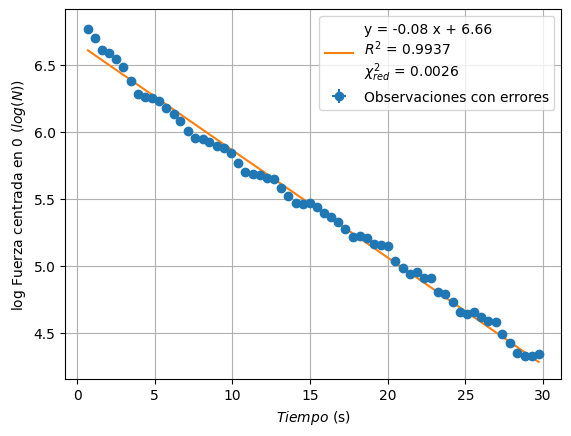

Valor de Lambda = 0.0800631810689635 +- 0.000361146385924311
Valor de a = -0.0800631810689635 +- 0.000361146385924311
Valor de b = 6.662086225391234 +- 0.005615329224426367
Valor de A = 782.181042102955 +- 4.392204064512994
Valor de b = 0.02028961134649673 +- 9.153572390029104e-05
Valor de R2 = 0.9937347716463109
Valor de chi_2_red = 0.002616174547803286


In [283]:
a, b, da, db = fit_with_curve(lineal, df_lineal_max['time'], df_lineal_max['LN(N)'], df_lineal_max['error LN(N)'])

R2 = 1 - np.sum((lineal(df_lineal_max['time'], a, b) - df_lineal_max['LN(N)'])**2) / np.sum((df_lineal_max['LN(N)'] - np.mean(df_lineal_max['LN(N)']))**2)
chi_square = np.sum((df_lineal_max['LN(N)'] - lineal(df_lineal_max['time'], a, b)) / df_lineal_max['error LN(N)'])**2
chi_square_red = chi_square / (len(df_lineal_max) - 2)

plt.errorbar(df_lineal_max['time'], df_lineal_max['LN(N)'], xerr=df_lineal_max["error time"], yerr=df_lineal_max['error LN(N)'], fmt='o', label='Observaciones con errores')
#plt.plot(df_lineal_max['time'], df_lineal_max['w2'], 'o', label='Observaciones')

plt.plot(df_lineal_max['time'], lineal(df_lineal_max['time'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n" + r"$R^2$" + f" = {R2:.4f}\n" + r"$\chi _{red}^{2}$"+f" = {chi_square_red:.4f}")

plt.xlabel(r"$Tiempo$" + " (s)")
plt.ylabel(r'log Fuerza centrada en 0 $(log(N))$')
plt.legend()
plt.grid()
plt.show()

# calculemos A y gamma
Lambda = -a
dLambda = da
print(f"Valor de Lambda = {Lambda} +- {dLambda}")

print(f"Valor de a = {a} +- {da}")
print(f"Valor de b = {b} +- {db}")

A = np.exp(b)
dA = np.exp(b) * db
print(f"Valor de A = {A} +- {dA}")

b = 2 * m * Lambda
db = np.sqrt((2*m*dLambda)**2 + (2*Lambda*dm)**2)

print(f"Valor de b = {b} +- {db}")

print(f"Valor de R2 = {R2}")
print(f"Valor de chi_2_red = {chi_square_red}")

In [284]:
df_lineal_all = all_cycles.copy()
df_lineal_all["error time"] = 1/200
df_lineal_all["LN(N)"] = np.log(df_lineal_all["(N)"])
df_lineal_all["error N"] = y_error
df_lineal_all['error LN(N)']= 1/(df_lineal_all['LN(N)']) * df_lineal_all["error N"]

In [285]:
df_lineal_all

time         (N)  error time     LN(N)   error N  error LN(N)
140    0.700  870.255841       0.005  6.768787  0.132259     0.019540
233    1.165  809.368466       0.005  6.696254  0.132259     0.019751
325    1.625  741.848521       0.005  6.609145  0.132259     0.020012
416    2.080  723.675086       0.005  6.584343  0.132259     0.020087
505    2.525  695.552798       0.005  6.544707  0.132259     0.020209
...      ...         ...         ...       ...       ...          ...
5618  28.090   79.668137       0.005  4.377870  0.132259     0.030211
5712  28.560   80.463653       0.005  4.387806  0.132259     0.030143
5810  29.050   81.126910       0.005  4.396015  0.132259     0.030086
5899  29.495   79.534898       0.005  4.376196  0.132259     0.030222
5989  29.945   73.964323       0.005  4.303583  0.132259     0.030732

[128 rows x 6 columns]

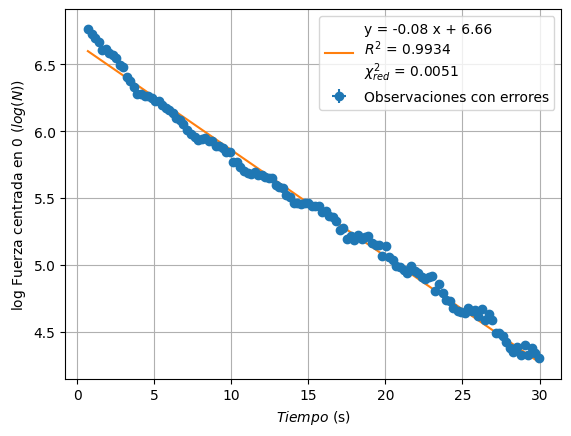

Valor de Lambda = 0.07955708462131661 +- 0.0002556078201813598
Valor de a = -0.07955708462131661 +- 0.0002556078201813598
Valor de b = 6.655248674981036 +- 0.004001846480408984
Valor de A = 776.8510824969686 +- 3.108838770292403
Valor de b = 0.020161356384734052 +- 6.479567300917571e-05
Valor de R2 = 0.9933654513010683
Valor de chi_2_red = 0.005120532757598882


In [286]:
a, b, da, db = fit_with_curve(lineal, df_lineal_all['time'], df_lineal_all['LN(N)'], df_lineal_all['error LN(N)'])

R2 = 1 - np.sum((lineal(df_lineal_all['time'], a, b) - df_lineal_all['LN(N)'])**2) / np.sum((df_lineal_all['LN(N)'] - np.mean(df_lineal_all['LN(N)']))**2)
chi_square = np.sum((df_lineal_all['LN(N)'] - lineal(df_lineal_all['time'], a, b)) / df_lineal_all['error LN(N)'])**2
chi_square_red = chi_square / (len(df_lineal_all) - 2)

plt.errorbar(df_lineal_all['time'], df_lineal_all['LN(N)'], xerr=df_lineal_all["error time"], yerr=df_lineal_all['error LN(N)'], fmt='o', label='Observaciones con errores')
#plt.plot(df_lineal_all['time'], df_lineal_all['w2'], 'o', label='Observaciones')

plt.plot(df_lineal_all['time'], lineal(df_lineal_all['time'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n" + r"$R^2$" + f" = {R2:.4f}\n" + r"$\chi _{red}^{2}$"+f" = {chi_square_red:.4f}")

plt.xlabel(r"$Tiempo$" + " (s)")
plt.ylabel(r'log Fuerza centrada en 0 $(log(N))$')
plt.legend()
plt.grid()
plt.show()

# calculemos A y gamma
Lambda = -a
dLambda = da
print(f"Valor de Lambda = {Lambda} +- {dLambda}")

print(f"Valor de a = {a} +- {da}")
print(f"Valor de b = {b} +- {db}")

A = np.exp(b)
dA = np.exp(b) * db
print(f"Valor de A = {A} +- {dA}")

b = 2 * m * Lambda
db = np.sqrt((2*m*dLambda)**2 + (2*Lambda*dm)**2)

print(f"Valor de b = {b} +- {db}")

print(f"Valor de R2 = {R2}")
print(f"Valor de chi_2_red = {chi_square_red}")